In [1]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
% matplotlib inline
random.seed(42)

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# No. rows in the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
df.user_id.nunique()

290584

In [5]:
df.converted.mean()

0.11965919355605512

In [6]:
df["converted"][0:5].mean()   # Test my code

0.2

In [7]:
df.groupby(['group','landing_page']).size()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
dtype: int64

In [8]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [9]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
df2 = df.drop(df[(df.group == 'control') & (df.landing_page == 'new_page')].index)
df2 = df2.drop(df2[(df2.group == 'treatment') & (df2.landing_page == 'old_page')].index)

In [11]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
df2.user_id.nunique()

290584

In [14]:
df2.user_id[df2.user_id.duplicated()]

2893    773192
Name: user_id, dtype: int64

In [15]:
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df2.drop_duplicates(subset='user_id', inplace=True)

In [17]:
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [18]:
df2.converted.mean()

0.11959708724499628

In [19]:
df2[df2.group=='control'].converted.mean()

0.1203863045004612

In [20]:
df2[df2.group=='treatment'].converted.mean()

0.11880806551510564

In [21]:
len(df2[df2.landing_page == "new_page"])/len(df2)

0.5000619442226688

In [22]:
# So in this dataset, the control group has a higher converted rate than the treatment group's converted rate.
# The converted rate difference between control group and treatment group is 0.15% (observed difference). 
# So, there is NO SUFFICIENT EVIDENCE that the new treatment page leads to more conversions.

In [23]:
# The null and alternative hypotheses will be:
    # H0 (Null hypotheses): Pnew <= Pold
    # H1 (Alternative hypotheses): Pnew > Pold
# In which Pnew means the probability of converted rates for the new page and Pold means the probability of converted rates for the old page

In [24]:
# Assume under the null hypothesis, Pnew and Pold are both equal to the converted success rate regardless of page. 
# Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of page. 

p_new  = df2.converted.mean()
p_old  = df2.converted.mean()

print(p_new, p_old)


0.11959708724499628 0.11959708724499628


In [25]:
# No. of individuals in the treatment group (n_new) and in control group (n_old):
n_new = len(df2.query('group == "treatment"'))
n_old = len(df2.query('group == "control"'))

print (n_new, n_old)

145310 145274


In [26]:
# Simulate (n_new) transactions with a conversion rate of p_new under the NULL.
# Store these (n_new) 1's and 0's in new_page_converted.
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new,(1-p_new)])

In [27]:
# Simulate (n_old) transactions with a conversion rate of p_old under the NULL.
# Store these (n_old) 1's and 0's in old_page_converted.
old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old,(1-p_old)])

In [28]:
# Find Pnew - Pold = diff:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.0011033170699057543

In [29]:
# Create 10,000 Pnew - Pold values using the same simulation process above. 
# Store values in a Numpy array called p_diffs.
p_diffs=[]
for i in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new,(1-p_new)]).mean()
    old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old,(1-p_old)]).mean()
    diff= new_page_converted - old_page_converted
    p_diffs.append(diff)

In [30]:
# Remember the observed difference mentioned above? We should include this in the following plot so that we know 
# more about where it is in the plot and from that to decide anything else. 
# First, calculate that observed difference and store it in observed_difference:
observed_difference = df2[df2.group=='treatment'].converted.mean() - df2[df2.group=='control'].converted.mean()

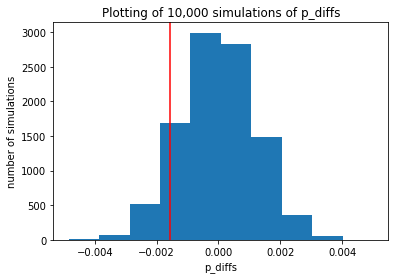

In [31]:
# Plotting a histogram of the p_diffs. 
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('number of simulations')
plt.title('Plotting of 10,000 simulations of p_diffs')
plt.axvline(observed_difference, color = 'red')   # draw a line on x-axis of value of observed difference

In [32]:
# What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?
# First, I calculate the actual observed difference in ab_data.csv:
original_difference = df[df['group']=='treatment'].converted.mean() - df[df['group']=='control'].converted.mean()
print (original_difference)
# Convert the p_diffs (from objective) to numpy array to compare later on (if not converted, it will be error between float,int,str)
p_diffs = np.array(p_diffs)
# Compare:
(original_difference < p_diffs).mean()


-0.0014795997940775518


0.8899

In [33]:
# TO this step, we are running the test under the NULL hypotheses which is the old webpage has better or equal 
# conversion rate than the new webpage's conversion rate. 
# The P-value (88.99%) is far higher than the typical alpha of 5% in standard business studies (Remember only reject
# the null when null P-value equals or less than 0.05). A high percentage of P-value means that there is NO statistical 
# evidence to reject the null hypotheses. 
# The Null hypotheses is TRUE: Pold >= Pnew

In [34]:
# The 2nd way is to use a built-in to achieve the similiar results. We, step by step, calculate the number of conversions
# for each page, as well as the number of individuals who received each page. Let n_old and n_new refer to the number
# of rows associated with the old page and new page respectively
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))
print (convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


In [35]:
# Now use stats.proportions_ztest to compute your test statistic and p-value. 
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print (p_value, z_score)

0.9050583127590245 -1.3109241984234394


In [36]:
# z-score is the no of standard deviation a data-point is from the population mean. 
# z_score = -1.31 is greater than the value of one-tail test (-0.1645), thus it suggests that we can't reject the null
# p_value determine the significance of the results. Again, it is more than 5% alpha to suggest that there is no
# statistical evidence to reject the null hypo.

In [37]:
# Part III - A regression Approach:
# Since each row is either converted or not converted, it recalls us about get dummies with 2 values 0,1. So it is
# LOGISTIC REGRESSION.

In [40]:
# Statsmodels kicks in this case to fit the regression model to see if there is a significant difference in conversion
# based on which page a customer receives. 
# Let's create an intercept, dummy variable column
df2['intercept']= 1
df2[['page','page1']] = pd.get_dummies(df2['group'])
print(df2.head())

   user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  page  page1  
0          1     1      0  
1          1     1      0  
2          1     0      1  
3          1     0      1  
4          1     1      0  


In [41]:
# drop column 'page' and keep 'page1' in which control=0 and treatment=1
df2 = df2.drop('page', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,page1
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [42]:
# use statsmodels to instantiate regression model on the two columns created above to predict if an individual converts
log_mod = sm.Logit(df2["converted"], df2[['intercept', 'page1']])
log_mod

In [43]:
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        16:24:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
page1         -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [44]:
# p-value associated with page1 is 0.19 given the new pair of hypothesis is as follows:
# H0: p_old = p_new
# H1: p_old != p_new

In [45]:
# In the Logit Regression Model, it solely relies on 2 assumptions. these two possible outcomes yield a lower chance 
# in the null hypo above. 
# We can consider other more sophisticated model to have a better analysis of the outcomes. However, it may result 
# error of accuracy because of correlations amongst each factor added to the model.